## Import essential libraries

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

import keras
from keras.models import Sequential
from keras import datasets
from keras import layers
from keras import optimizers
from keras import losses
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Dropout, Flatten, BatchNormalization
from keras.initializers import glorot_uniform, zeros
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator

import os

# using gpu
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

## Load CIFAR-10 dataset

In [ ]:
# Reading data.
cifar10 = datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Scaling.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
mean = np.mean(X_train,axis=(0,1,2,3))
std = np.std(X_train,axis=(0,1,2,3))
x_train = (X_train-mean)/(std+1e-7)
x_test = (X_test-mean)/(std+1e-7)

# One hot encoding.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
# checking the shape of train and test data.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


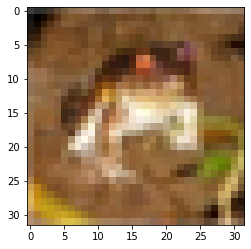

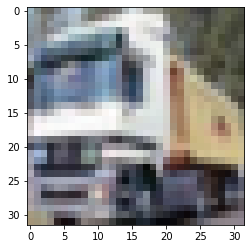

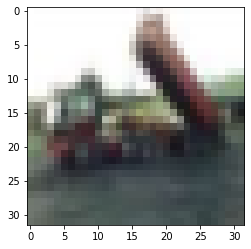

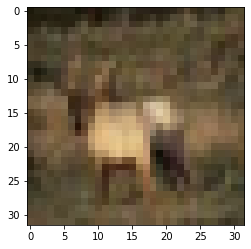

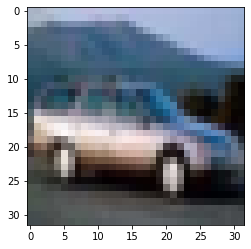

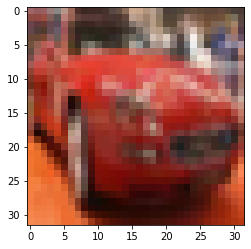

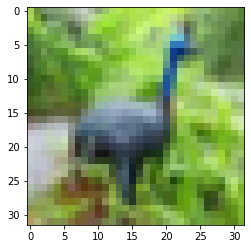

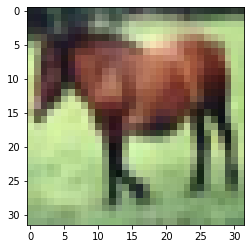

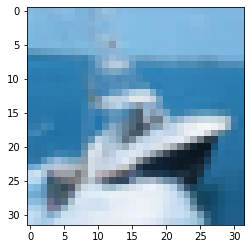

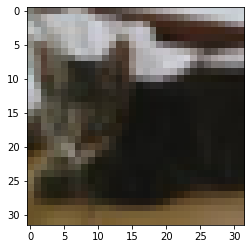

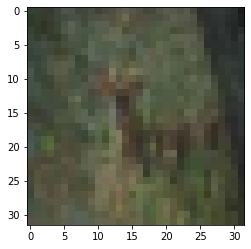

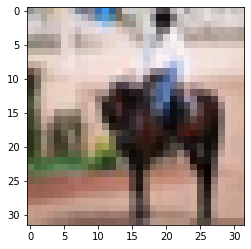

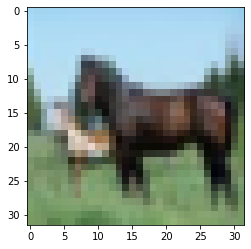

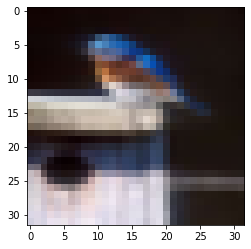

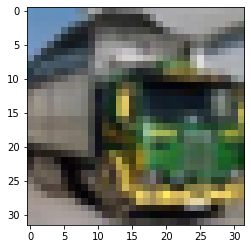

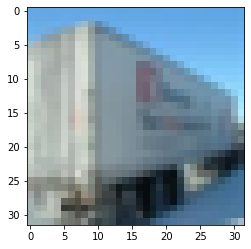

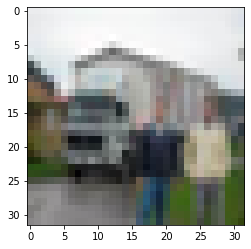

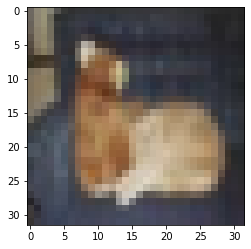

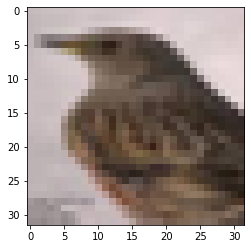

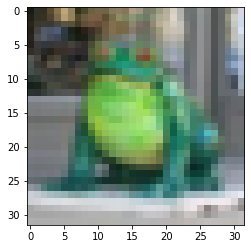

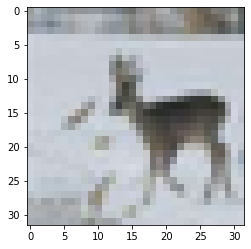

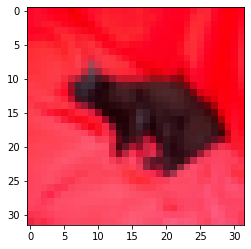

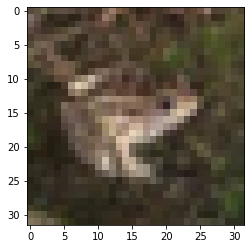

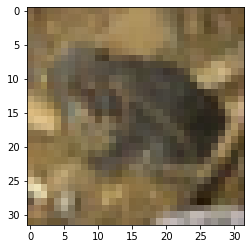

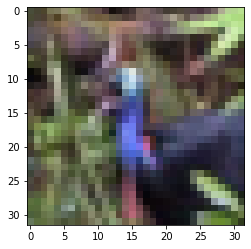

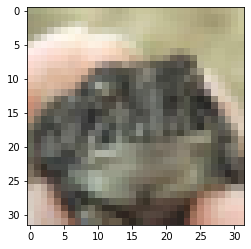

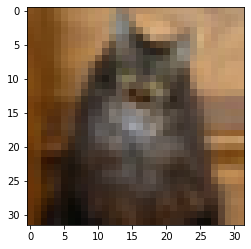

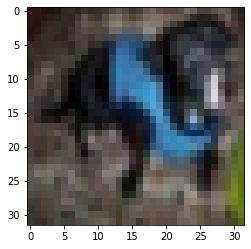

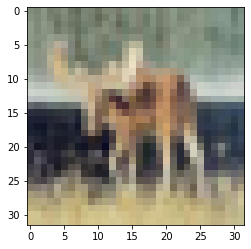

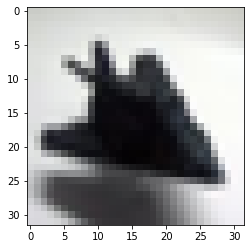

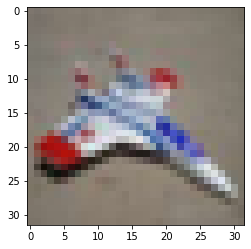

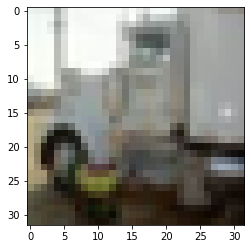

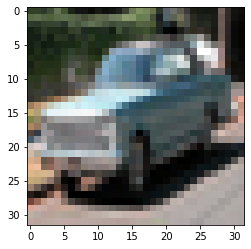

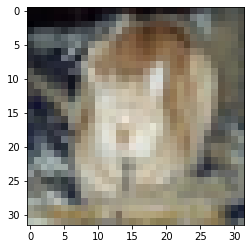

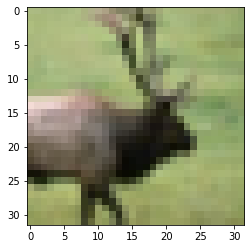

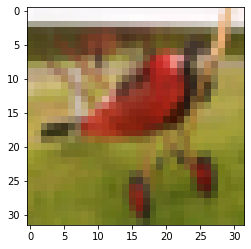

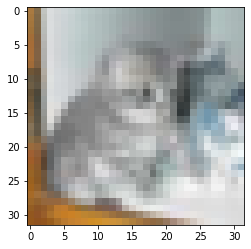

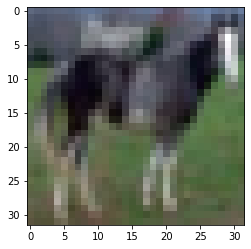

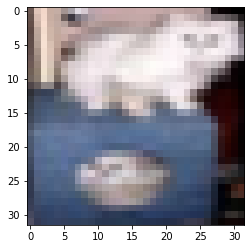

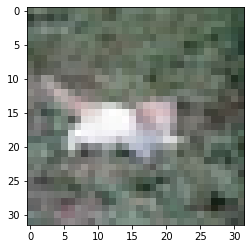

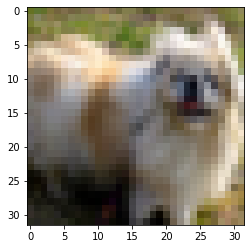

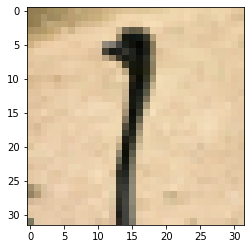

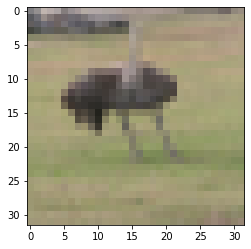

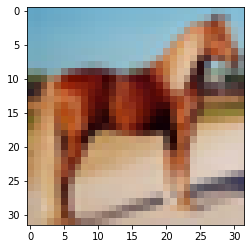

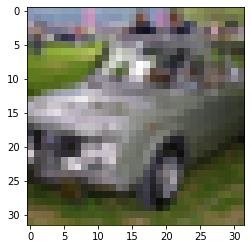

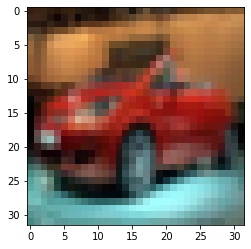

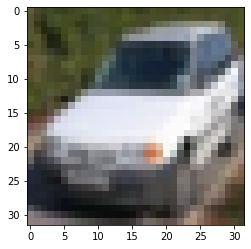

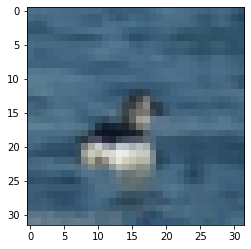

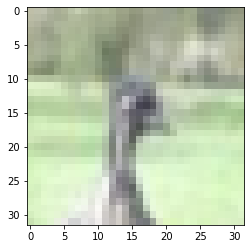

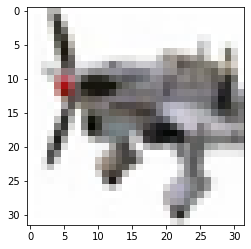

In [ ]:
# Ploting some images.
for i in range(50):
  imgplot = plt.imshow(X_train[i].reshape(32, 32, 3)/255.)
  plt.show()

## Model definition

In [ ]:
input_shape = X_train.shape[1:]
num_classes = 10

In [ ]:
baseMapNum = 32
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:], use_bias=True, kernel_initializer=glorot_uniform()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), use_bias=True, kernel_initializer=glorot_uniform()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), use_bias=True, kernel_initializer=glorot_uniform()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), use_bias=True, kernel_initializer=glorot_uniform()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), use_bias=True, kernel_initializer=glorot_uniform()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), use_bias=True, kernel_initializer=glorot_uniform()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', use_bias=True,
                kernel_initializer=glorot_uniform(),
                kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', use_bias=True, kernel_initializer=glorot_uniform()))







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
# You can see a summary of the structure and parameters of your model here.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)       

## Data Augmentation

In [ ]:
#data augmentation
aug_data = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
aug_data.fit(X_train)

### First Part of Training



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100


781/781 [==============================] - 32s 41ms/step - loss: 1.7671 - acc: 0.4248 - val_loss: 1.6701 - val_acc: 0.5148
Epoch 2/100
781/781 [==============================] - 29s 37ms/step - loss: 1.2352 - acc: 0.5979 - val_loss: 1.3837 - val_acc: 0.5865
Epoch 3/100
781/781 [==============================] - 29s 37ms/step - loss: 1.0916 - acc: 0.6572 - val_loss: 1.1287 - val_acc: 0.6517
Epoch 4/100
781/781 [==============================] - 28s 36ms/step - loss: 1.0128 - acc: 0.6941 - val_loss: 1.0638 - val_acc: 0.6816
Epoch 5/100
781/781 [==============================] - 29s 37ms/step - loss: 0.9580 - acc: 0.7168 - val_loss: 1.1365 - val_acc: 0.6758
Epoch 6/100
781/781 [==============================] - 28s 36ms/step - loss: 0.9271 - acc: 0.7330 - val_loss: 0.9662 - val_acc: 0.7201
Epoch 7/100
781/781 [==============================] - 29s 37ms/step - loss: 0.9015 - acc:

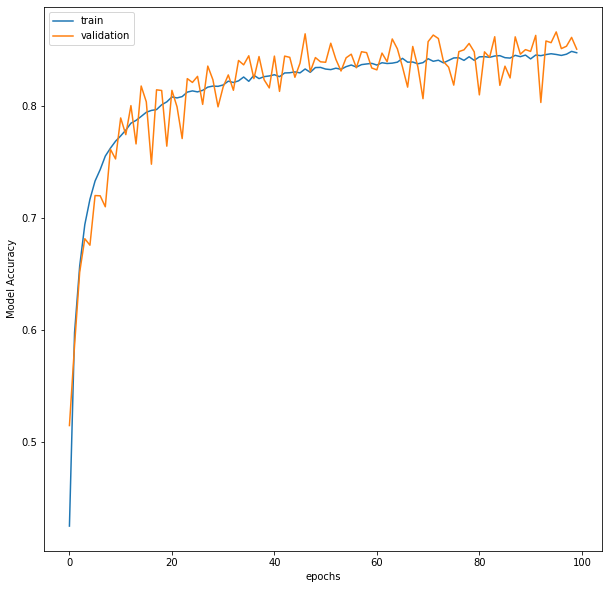

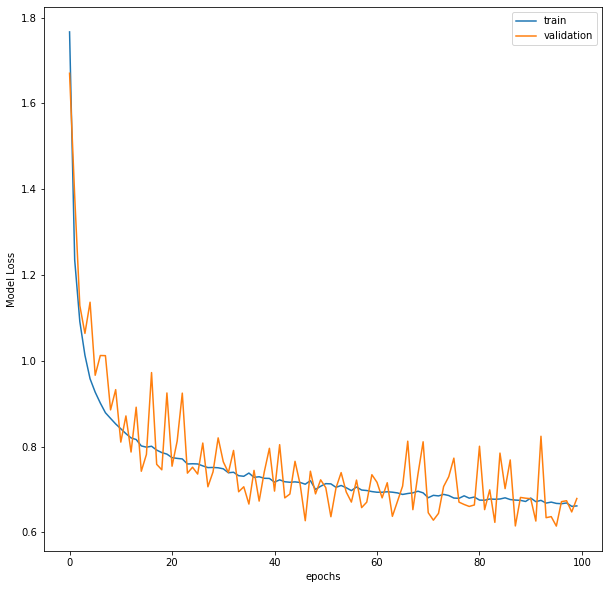

In [ ]:
# Hyperparameters.
learning_rate = 0.001
batch_size = 64
epochs = 100

# Optimizer.
opt = optimizers.rmsprop(lr=learning_rate, decay=1e-6)

# Compile.
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# # Callbacks.
# checkpoint_name = 'Weights-{epoch:03d}---part1---{val_loss:.5f}.hdf5' 
# checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss',
#                              verbose = 1, save_best_only = True, mode ='auto')
# callbacks_list = [checkpoint]

# Train.
history = model.fit_generator(aug_data.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs, verbose=1, validation_data=(X_test,y_test))
# Evaluate.
score_ts = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
score_tr = model.evaluate(X_train, y_train, batch_size=128, verbose=1)
print('============================== After First Part of Training ==============================')
print('Train Accuracy: {0} Loss: {1}'.format(score_tr[1]*100, score_tr[0]))
print('Test Accuracy: {0} Loss: {1}'.format(score_ts[1]*100, score_ts[0]))

# You can plot the accuracy as well as loss of the model on both train data and validation data.
def plot_history(history):
    
    plt.figure(figsize=(10, 10))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.xlabel('epochs'), plt.ylabel('Model Accuracy')
    plt.legend(), plt.show()
    
    plt.figure(figsize=(10, 10))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.xlabel('epochs'), plt.ylabel('Model Loss')
    plt.legend(), plt.show()
    
plot_history(history)

### Second Part of Training

Epoch 1/50
781/781 [==============================] - 31s 39ms/step - loss: 0.6251 - acc: 0.8597 - val_loss: 0.5855 - val_acc: 0.8732
Epoch 2/50
781/781 [==============================] - 29s 37ms/step - loss: 0.5990 - acc: 0.8661 - val_loss: 0.5729 - val_acc: 0.8796
Epoch 3/50
781/781 [==============================] - 28s 36ms/step - loss: 0.5908 - acc: 0.8682 - val_loss: 0.5680 - val_acc: 0.8759
Epoch 4/50
781/781 [==============================] - 29s 37ms/step - loss: 0.5843 - acc: 0.8681 - val_loss: 0.5533 - val_acc: 0.8791
Epoch 5/50
781/781 [==============================] - 29s 37ms/step - loss: 0.5759 - acc: 0.8687 - val_loss: 0.5494 - val_acc: 0.8814
Epoch 6/50
781/781 [==============================] - 29s 37ms/step - loss: 0.5723 - acc: 0.8670 - val_loss: 0.5405 - val_acc: 0.8828
Epoch 7/50
781/781 [==============================] - 29s 37ms/step - loss: 0.5665 - acc: 0.8696 - val_loss: 0.5403 - val_acc: 0.8838
Epoch 8/50
781/781 [==============================] - 29s 37ms

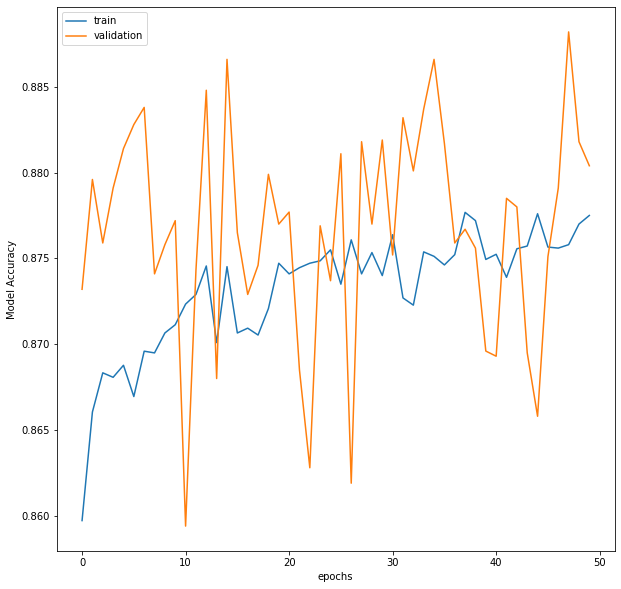

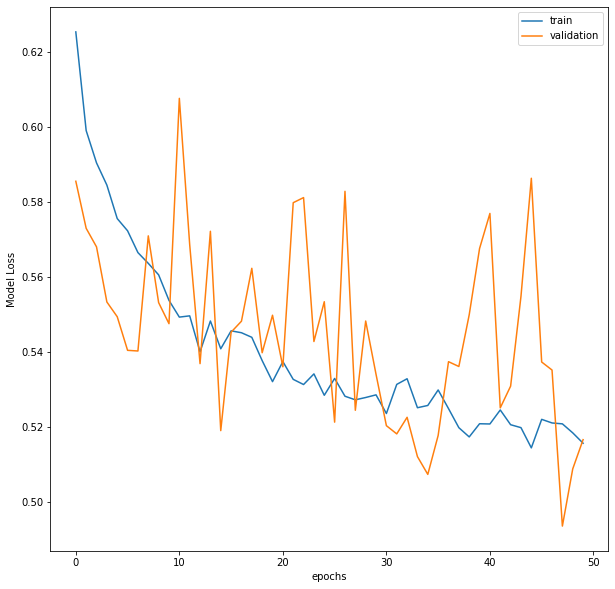

In [ ]:
# Hyperparameters.
learning_rate = 0.0005
batch_size = 64
epochs = 50

# Optimizer.
opt = optimizers.rmsprop(lr=learning_rate, decay=1e-6)

# Compile.
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks.
# checkpoint_name = 'Weights-{epoch:03d}---part2---{val_loss:.5f}.hdf5' 
# checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss',
#                              verbose = 1, save_best_only = True, mode ='auto')
# callbacks_list = [checkpoint]

# Train.
history = model.fit_generator(aug_data.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs, verbose=1, validation_data=(X_test,y_test))
# Evaluate.
score_ts = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
score_tr = model.evaluate(X_train, y_train, batch_size=128, verbose=1)
print('\n\n============================== After Second Part of Training ==============================')
print('Train Accuracy: {0} Loss: {1}'.format(score_tr[1]*100, score_tr[0]))
print('Test Accuracy: {0} Loss: {1}'.format(score_ts[1]*100, score_ts[0]))

# You can plot the accuracy as well as loss of the model on both train data and validation data.
def plot_history(history):
    
    plt.figure(figsize=(10, 10))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.xlabel('epochs'), plt.ylabel('Model Accuracy')
    plt.legend(), plt.show()
    
    plt.figure(figsize=(10, 10))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.xlabel('epochs'), plt.ylabel('Model Loss')
    plt.legend(), plt.show()
    
plot_history(history)

### Third Part of Training

Epoch 1/50
781/781 [==============================] - 30s 38ms/step - loss: 0.4967 - acc: 0.8823 - val_loss: 0.4865 - val_acc: 0.8908
Epoch 2/50
781/781 [==============================] - 28s 36ms/step - loss: 0.4870 - acc: 0.8847 - val_loss: 0.4895 - val_acc: 0.8905
Epoch 3/50
781/781 [==============================] - 29s 37ms/step - loss: 0.4857 - acc: 0.8851 - val_loss: 0.4620 - val_acc: 0.8951
Epoch 4/50
781/781 [==============================] - 28s 36ms/step - loss: 0.4780 - acc: 0.8885 - val_loss: 0.5036 - val_acc: 0.8871
Epoch 5/50
781/781 [==============================] - 29s 37ms/step - loss: 0.4727 - acc: 0.8891 - val_loss: 0.4890 - val_acc: 0.8886
Epoch 6/50
781/781 [==============================] - 29s 37ms/step - loss: 0.4741 - acc: 0.8862 - val_loss: 0.4703 - val_acc: 0.8939
Epoch 7/50
781/781 [==============================] - 28s 36ms/step - loss: 0.4695 - acc: 0.8910 - val_loss: 0.4564 - val_acc: 0.8959
Epoch 8/50
781/781 [==============================] - 28s 36ms

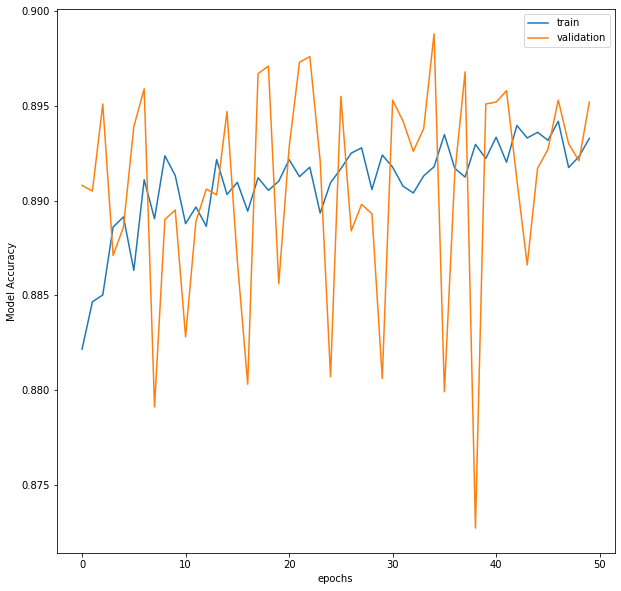

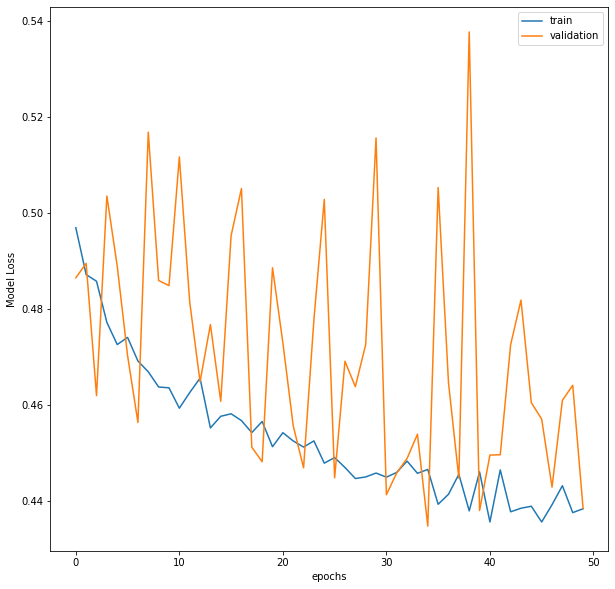

In [ ]:
# Hyperparameters.
learning_rate = 0.0003
batch_size = 64
epochs = 50

# Optimizer.
opt = optimizers.rmsprop(lr=learning_rate, decay=1e-6)

# Compile.
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks.
# checkpoint_name = 'Weights-{epoch:03d}---part3---{val_loss:.5f}.hdf5' 
# checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss',
#                              verbose = 1, save_best_only = True, mode ='auto')
# callbacks_list = [checkpoint]

# Train.
history = model.fit_generator(aug_data.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs, verbose=1, validation_data=(X_test,y_test))
# Evaluate.
score_ts = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
score_tr = model.evaluate(X_train, y_train, batch_size=128, verbose=1)
print('\n\n============================== After Third Part of Training ==============================')
print('Train Accuracy: {0} Loss: {1}'.format(score_tr[1]*100, score_tr[0]))
print('Test Accuracy: {0} Loss: {1}'.format(score_ts[1]*100, score_ts[0]))

# You can plot the accuracy as well as loss of the model on both train data and validation data.
def plot_history(history):
    
    plt.figure(figsize=(10, 10))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.xlabel('epochs'), plt.ylabel('Model Accuracy')
    plt.legend(), plt.show()
    
    plt.figure(figsize=(10, 10))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.xlabel('epochs'), plt.ylabel('Model Loss')
    plt.legend(), plt.show()
    
plot_history(history)

### Forth Part of Training

Epoch 1/25
781/781 [==============================] - 30s 38ms/step - loss: 0.4185 - acc: 0.8991 - val_loss: 0.4460 - val_acc: 0.8980
Epoch 2/25
781/781 [==============================] - 29s 37ms/step - loss: 0.4042 - acc: 0.9041 - val_loss: 0.4359 - val_acc: 0.9013
Epoch 3/25
781/781 [==============================] - 28s 36ms/step - loss: 0.4064 - acc: 0.9034 - val_loss: 0.4228 - val_acc: 0.9024
Epoch 4/25
781/781 [==============================] - 28s 36ms/step - loss: 0.3975 - acc: 0.9049 - val_loss: 0.4281 - val_acc: 0.9006
Epoch 5/25
781/781 [==============================] - 28s 36ms/step - loss: 0.3983 - acc: 0.9049 - val_loss: 0.4201 - val_acc: 0.9044
Epoch 6/25
781/781 [==============================] - 28s 36ms/step - loss: 0.3940 - acc: 0.9075 - val_loss: 0.4379 - val_acc: 0.8967
Epoch 7/25
781/781 [==============================] - 28s 36ms/step - loss: 0.3930 - acc: 0.9067 - val_loss: 0.4121 - val_acc: 0.9076
Epoch 8/25
781/781 [==============================] - 29s 37ms

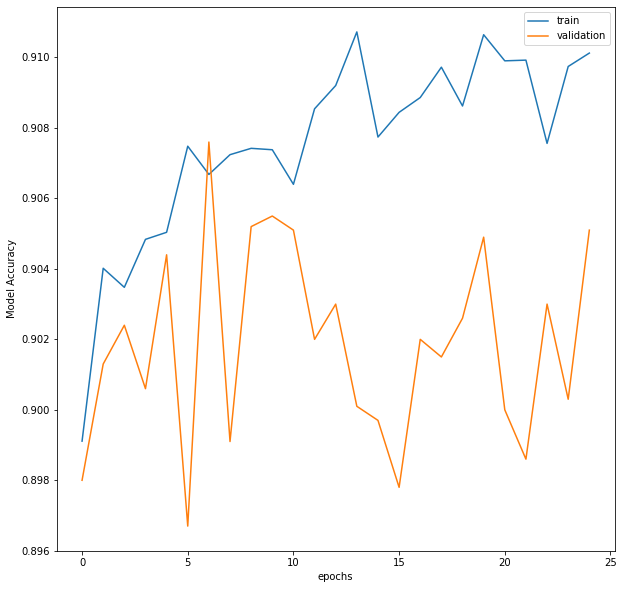

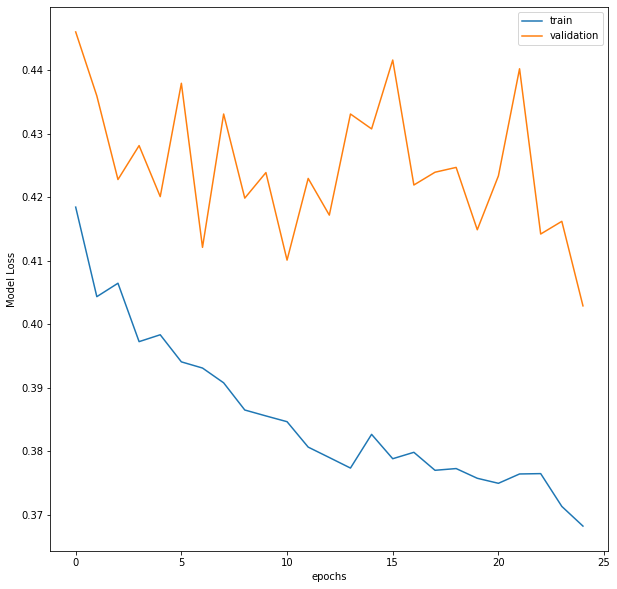

In [ ]:
# Hyperparameters.
learning_rate = 0.0001
batch_size = 64
epochs = 25

# Optimizer.
opt = optimizers.rmsprop(lr=learning_rate, decay=1e-6)

# Compile.
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks.
# checkpoint_name = 'Weights-{epoch:03d}---part4---{val_loss:.5f}.hdf5' 
# checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss',
#                              verbose = 1, save_best_only = True, mode ='auto')
# callbacks_list = [checkpoint]

# Train.
history = model.fit_generator(aug_data.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    epochs=epochs, verbose=1, validation_data=(X_test,y_test))
# Evaluate.
score_ts = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
score_tr = model.evaluate(X_train, y_train, batch_size=128, verbose=1)
print('\n\n============================== After Forth Part of Training ==============================')
print('Train Accuracy: {0} Loss: {1}'.format(score_tr[1]*100, score_tr[0]))
print('Test Accuracy: {0} Loss: {1}'.format(score_ts[1]*100, score_ts[0]))

# You can plot the accuracy as well as loss of the model on both train data and validation data.
def plot_history(history):
    
    plt.figure(figsize=(10, 10))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.xlabel('epochs'), plt.ylabel('Model Accuracy')
    plt.legend(), plt.show()
    
    plt.figure(figsize=(10, 10))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.xlabel('epochs'), plt.ylabel('Model Loss')
    plt.legend(), plt.show()
    
plot_history(history)

## Evaluating your model

In [ ]:
# Scores.
score_ts = model.evaluate(X_test, y_test, batch_size=128, verbose=1)
score_tr = model.evaluate(X_train, y_train, batch_size=128, verbose=1)
print('\n\n============================== Final Results ==============================')
print('Train Accuracy: {0} Loss: {1}'.format(score_tr[1]*100, score_tr[0]))
print('Test Accuracy: {0} Loss: {1}'.format(score_ts[1]*100, score_ts[0]))

50000/50000 [==============================] - 3s 68us/step


============================== Final Results ==============================
Train Accuracy: 95.53200000190735 Loss: 0.23808688516616822
Test Accuracy: 90.51 Loss: 0.4028749557495117


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Save model and weights.
model_path = 'drive/My Drive/Colab Notebooks/Model/CIFAR10-CNN-90+'
model.save(model_path)